In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os.path
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
from pandas.tseries.offsets import MonthEnd
import math

In [2]:
cm = 1 / 2.54  # inches to cm
wu = 11*cm  # width unit
hu = 11*cm  # height unit

LEAST_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=LEAST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Aldegondabreen:

In [3]:
in_file = os.path.join(globals()['_dh'][0], "data/aldegonda_mass_balance_2001-2020.csv")
fig_dir = os.path.join(globals()['_dh'][0], "fig")

tmp = pd.read_csv(in_file)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_start  19 non-null     int64  
 1   year_end    19 non-null     int64  
 2   year        19 non-null     object 
 3   ba          18 non-null     float64
 4   ba-sigma    18 non-null     float64
 5   ba-lo       18 non-null     float64
 6   ba-hi       18 non-null     float64
 7   bw          19 non-null     float64
 8   bw-sigma    19 non-null     float64
 9   bw-lo       19 non-null     float64
 10  bw-hi       19 non-null     float64
 11  ba-2sigma   18 non-null     float64
 12  bw-2sigma   19 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 2.1+ KB


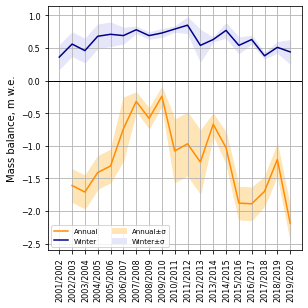

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(1*wu, 1*hu)
plt.xticks(rotation=90)

x = tmp["year"]
ax.fill_between(x, tmp["ba-lo"], tmp["ba-hi"], color="moccasin", label="Annual±σ")
ax.plot(x, tmp["ba"], color="darkorange", label="Annual")

ax.fill_between(x, tmp["bw-lo"], tmp["bw-hi"], color="lavender", label="Winter±σ")
ax.plot(x, tmp["bw"], color="darkblue", label="Winter")

ax.grid()
plt.axhline(0, color='black', linewidth=1)

ax.set_ylabel("Mass balance, m w.e.")

fig.tight_layout()
ax.legend(ncol=2)

fig_paths = ("aldegondabreen_mass_balance.png", "aldegondabreen_mass_balance.pdf")
for fig_path in fig_paths:
    plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")

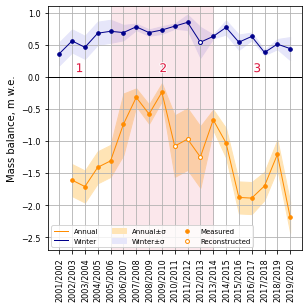

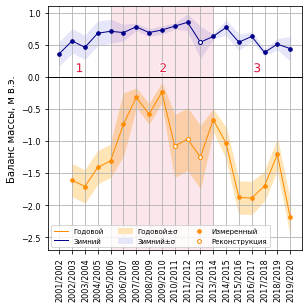

In [5]:
x = tmp["year"]

labels = {"EN": ["Annual±σ", "Annual", "Winter±σ", "Winter", "Measured", "Reconstructed", "Mass balance, m w.e."], 
          "RU": ["Годовой±σ", "Годовой", "Зимний±σ", "Зимний", "Измеренный", "Реконструкция", "Баланс массы, м в.э."]}

for lang in labels.keys():
    fig, ax = plt.subplots()
    fig.set_size_inches(1*wu, 1*hu)
    plt.xticks(rotation=90)
    
    # 1) plotting mass-balance values and their uncertainty bands:
    ax.fill_between(x, tmp["ba-lo"], tmp["ba-hi"], color="moccasin", label=labels[lang][0])
    ax.plot(x, tmp["ba"], color="darkorange", label=labels[lang][1], linewidth=1)

    ax.fill_between(x, tmp["bw-lo"], tmp["bw-hi"], color="lavender", label=labels[lang][2])
    ax.plot(x, tmp["bw"], color="darkblue", label=labels[lang][3], linewidth=1)

    # 2) let's mark which values are reconstructed ones:
    ax.scatter(x, tmp["bw"], s=13, color="darkblue", zorder=9)
    ax.scatter(x[11], tmp["bw"][11], s=15, color="white", edgecolor="darkblue", zorder=10)

    ax.scatter(x, tmp["ba"], s=13, color="darkorange", label=labels[lang][4], zorder=9)
    ax.scatter(x[9:12], tmp["ba"][9:12], s=15, color="white", edgecolor="darkorange", label=labels[lang][5], zorder=10)

    # 3) overlaying three periods of different atmospheric circulation:
    ax.axvspan(x[4], x[12], color="crimson", alpha=0.1)
    """
    for i, x_pos in zip((1, 2, 3), (x[2], x[8], x[15])):
        print(x_pos)
        ax.text(x_pos, 0.05, "%s" % i, color="crimson", fontsize=12, 
                   path_effects=[pe.withStroke(linewidth=2, foreground="white")])
    """
    # transform = ax.transAxes switches coordinate system from data to absolute
    for i, x_pos in zip((1, 2, 3), (0.11, 0.44, 0.81)):
        # print(x_pos)
        ax.text(x_pos, 0.73, "%s" % i, color="crimson", fontsize=12, transform = ax.transAxes,
                   path_effects=[pe.withStroke(linewidth=2, foreground="white")])

    # 4) all the needed decorations:
    ax.grid()
    plt.axhline(0, color='black', linewidth=1)

    ax.set_ylabel(labels[lang][6])
    ax.set_ylim(-2.7, 1.1)

    fig.tight_layout()
    ax.legend(ncol=3)

    fig_paths = ("aldegondabreen_mass_balance_mod_%s.png" % lang, "aldegondabreen_mass_balance_mod_%s.pdf" % lang)
    for fig_path in fig_paths:
        plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")

### Vestre Groenfjordbreen:

In [6]:
in_file = os.path.join(globals()['_dh'][0], "data/vestre_mass_balance_2013-2020.csv")
fig_dir = os.path.join(globals()['_dh'][0], "fig")

tmp = pd.read_csv(in_file)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_start  7 non-null      int64  
 1   year_end    7 non-null      int64  
 2   year        7 non-null      object 
 3   ba          7 non-null      float64
 4   ba-sigma    7 non-null      float64
 5   ba-lo       7 non-null      float64
 6   ba-hi       7 non-null      float64
 7   bw          7 non-null      float64
 8   bw-sigma    7 non-null      float64
 9   bw-lo       7 non-null      float64
 10  bw-hi       7 non-null      float64
dtypes: float64(8), int64(2), object(1)
memory usage: 744.0+ bytes


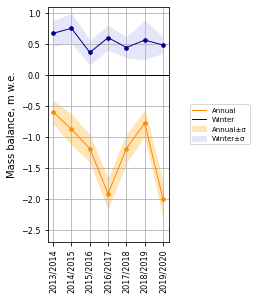

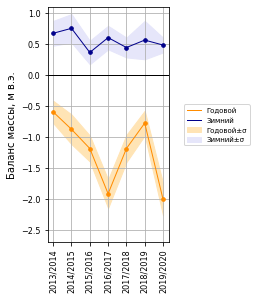

In [7]:
x = tmp["year"]

labels = {"EN": ["Annual±σ", "Annual", "Winter±σ", "Winter", "Measured", "Reconstructed", "Mass balance, m w.e."], 
          "RU": ["Годовой±σ", "Годовой", "Зимний±σ", "Зимний", "Измеренный", "Реконструкция", "Баланс массы, м в.э."]}

for lang in labels.keys():
    fig, ax = plt.subplots()
    fig.set_size_inches(0.5*wu, 1*hu)
    plt.xticks(rotation=90)

    # 1) plotting mass-balance values and their uncertainty bands:
    ax.fill_between(x, tmp["ba-lo"], tmp["ba-hi"], color="moccasin", label=labels[lang][0])
    ax.plot(x, tmp["ba"], color="darkorange", label=labels[lang][1], linewidth=1)

    ax.fill_between(x, tmp["bw-lo"], tmp["bw-hi"], color="lavender", label=labels[lang][2])
    ax.plot(x, tmp["bw"], color="darkblue", label=labels[lang][3], linewidth=1)

    # 2) we don't have any reconstructed values:
    ax.scatter(x, tmp["bw"], s=13, color="darkblue", zorder=9)
    # ax.scatter(x[11], tmp["bw"][11], s=15, color="white", edgecolor="darkblue", zorder=10)

    ax.scatter(x, tmp["ba"], s=13, color="darkorange", zorder=9)
    # ax.scatter(x[9:12], tmp["ba"][9:12], s=15, color="white", edgecolor="darkorange", label="Reconstructed", zorder=10)

    # 3) overlaying three periods of different atmospheric circulation:
    # ax.axvspan(x[4], x[12], color="crimson", alpha=0.1)

    # 4) all the needed decorations:
    ax.grid()
    plt.axhline(0, color='black', linewidth=1)

    ax.set_ylabel(labels[lang][6])
    ax.set_ylim(-2.7, 1.1)

    # fig.tight_layout()
    ax.legend(ncol=1, bbox_to_anchor=(1.7, 0.6))
    # fig.tight_layout(rect=[0,0,2,2])

    fig_paths = ("vestre_mass_balance_mod_%s.png" % lang, "vestre_mass_balance_mod_%s.pdf" % lang)
    for fig_path in fig_paths:
        plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white", bbox_inches="tight")